# Mount drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "drive/MyDrive/Colab Notebooks/asteroid_project"

/content/drive/MyDrive/Colab Notebooks/asteroid_project


# Dependencies

In [138]:
import pandas as pd  # general purpose
import numpy as np  # general purpose
from matplotlib import pyplot as plt  # Use for EDA
from mpl_toolkits.mplot3d import Axes3D  # Use for EDA
from sklearn.preprocessing import StandardScaler  # Use in Standardization
from sklearn.metrics import silhouette_score

# Read Dataset

In [115]:
L4_tro_df = pd.read_csv('L4_tro_df.csv', low_memory=False)

In [116]:
L4_tro_df

,Asteroid_ID,H,a,e,sin_i,"g(""/y)","s(""/y)",is_family_004,is_family_005,is_family_006,is_family_008,is_family
0,588,8.13,5.239179,0.1036,0.1969,344.40,-11.03,0,0,0,0,0
1,624,7.17,5.295619,0.0544,0.3259,335.65,-12.89,1,0,0,0,1
2,659,8.57,5.257123,0.1366,0.0857,354.60,-16.91,0,0,0,0,0
3,911,7.85,5.285594,0.0210,0.3863,317.22,-8.58,0,0,0,0,0
4,1143,8.31,5.255920,0.0522,0.0691,365.40,-10.91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3629,2016GX169,14.39,5.306045,0.0728,0.1895,354.97,-19.06,0,0,0,0,0
3630,2016GY236,13.77,5.242186,0.0338,0.1319,358.51,-8.62,0,0,0,0,0
3631,2016HQ11,14.19,5.319379,0.0565,0.1290,387.57,-22.11,0,0,0,0,0
3632,2016LO5,14.23,5.240081,0.0243,0.2671,338.78,-6.30,0,0,0,0,0


In [117]:
L4_tro_df['Family_ID'] = 0

In [118]:
L4_tro_df.loc[L4_tro_df['is_family_004'] == 1, 'Family_ID'] += 4
L4_tro_df.loc[L4_tro_df['is_family_005'] == 1, 'Family_ID'] += 5
L4_tro_df.loc[L4_tro_df['is_family_006'] == 1, 'Family_ID'] += 6
L4_tro_df.loc[L4_tro_df['is_family_008'] == 1, 'Family_ID'] += 8

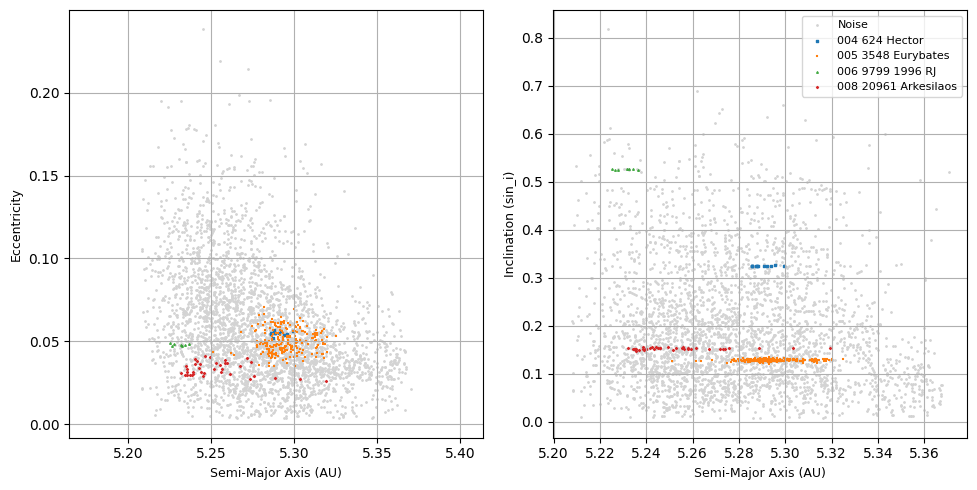

In [119]:
# Define markers, colors, and labels
markers = {
    0: 'o',  # Circle
    4: 's',  # Square
    5: '+',  # Plus
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

colors = {
    0: '#d3d3d3',
    4: '#1f77b4',
    5: '#ff7f0e',
    6: '#2ca02c',
    8: '#d62728'
}

labels = {
    0: 'Noise',
    4: '004 624 Hector',
    5: '005 3548 Eurybates',
    6: '006 9799 1996 RJ',
    8: '008 20961 Arkesilaos'
}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First plot: Semi-Major Axis vs Eccentricity
for family_id in L4_tro_df['Family_ID'].unique():
    subset = L4_tro_df[L4_tro_df['Family_ID'] == family_id]
    ax1.scatter(subset['a'], subset['e'], label=labels[family_id],
                marker=markers[family_id], color=colors[family_id], s=1)

# Add labels and title for the first plot
ax1.set_xlabel('Semi-Major Axis (AU)', fontsize=9)
ax1.set_ylabel('Eccentricity', fontsize=9)
# ax1.set_title('Scatter Plot of Asteroids by Family ID (Eccentricity)', fontsize=10)
# ax1.legend(fontsize=8)
ax1.axis('equal')
ax1.grid()

# Second plot: Semi-Major Axis vs sin(Inclination)
for family_id in L4_tro_df['Family_ID'].unique():
    subset = L4_tro_df[L4_tro_df['Family_ID'] == family_id]
    ax2.scatter(subset['a'], subset['sin_i'], label=labels[family_id],
                marker=markers[family_id], color=colors[family_id], s=1)

# Add labels and title for the second plot
ax2.set_xlabel('Semi-Major Axis (AU)', fontsize=9)
ax2.set_ylabel('Inclination (sin_i)', fontsize=9)
# ax2.set_title('Scatter Plot of Asteroids by Family ID (Inclination)', fontsize=10)
ax2.legend(fontsize=8)
ax2.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

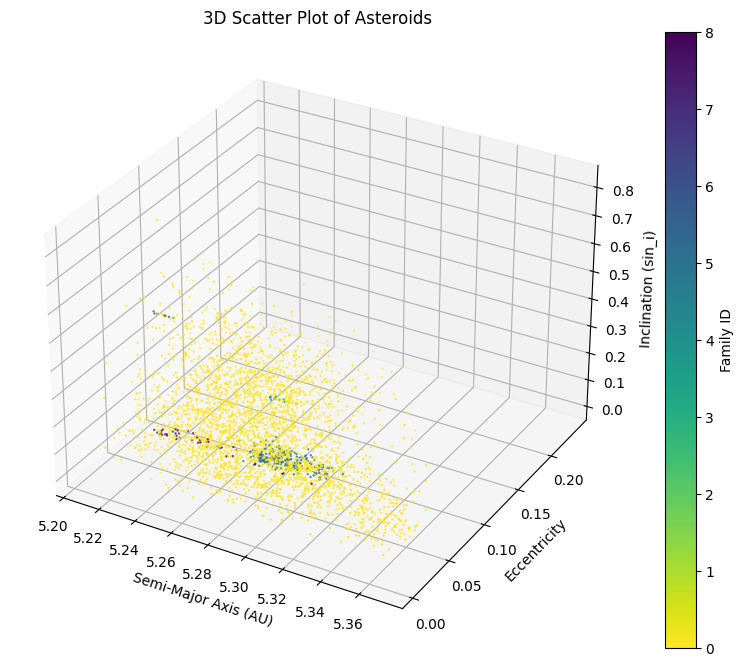

In [120]:
# Create a figure for the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
scatter = ax.scatter(
    L4_tro_df['a'],
    L4_tro_df['e'],
    L4_tro_df['sin_i'],
    s=0.5,
    c=L4_tro_df['Family_ID'],
    marker='o',
    cmap='viridis_r'
)

# Add labels
ax.set_xlabel('Semi-Major Axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Inclination (sin_i)')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Family ID')

# Show the plot
plt.title('3D Scatter Plot of Asteroids')
plt.show()

# PCA

In [121]:
Z_2 = L4_tro_df[['a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)']]

In [122]:
# Standardize the data
scaler = StandardScaler()
Z_2_scaled = scaler.fit_transform(Z_2)

In [123]:
scaled_tro_df = pd.DataFrame(Z_2_scaled, columns=['a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)'])

In [124]:
scaled_tro_df['Family_ID'] = L4_tro_df['Family_ID']

In [125]:
scaled_tro_df.head(10)

,a,e,sin_i,H,"g(""/y)","s(""/y)",Family_ID
0,-1.201062,1.418214,0.049736,-4.925315,0.227660,0.467360,0
1,0.483455,-0.080094,1.104256,-5.846245,0.112053,0.184806,4
2,-0.665487,2.423176,-0.859277,-4.503223,0.362424,-0.425875,0
3,0.184252,-1.097238,1.598000,-5.193920,-0.131447,0.839541,0
4,-0.701392,-0.147091,-0.994975,-4.752641,0.505115,0.485589,0
5,0.603137,0.577700,1.116518,-3.841305,0.091706,-0.100786,0
6,1.695231,-0.780522,1.486008,-4.867757,-3.657381,-0.916547,0
7,1.045959,-1.167281,2.410553,-4.541595,-0.594534,0.494704,0
8,-0.982643,0.053901,-0.606683,-2.651771,0.424917,0.629904,0
9,-0.162825,0.349299,-0.589516,-3.697410,0.513175,0.083026,0


In [90]:
from sklearn.decomposition import PCA

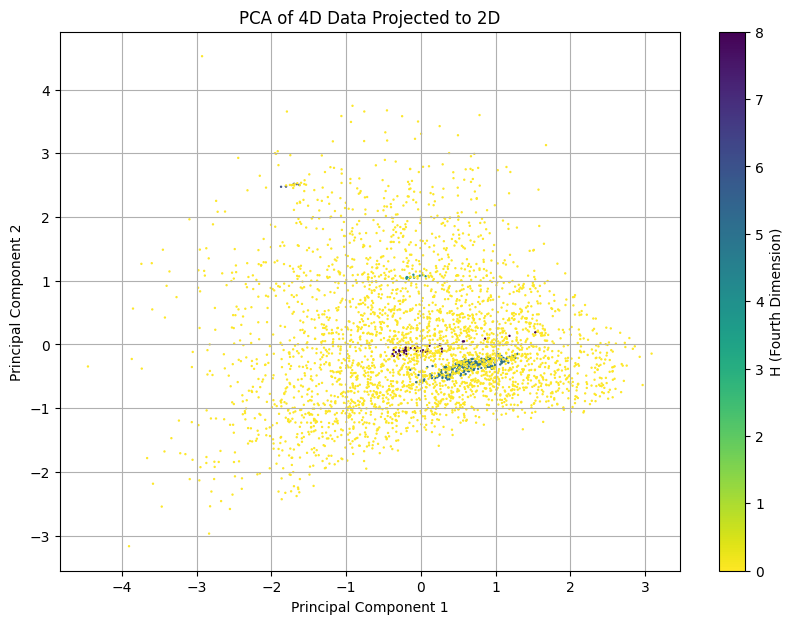

In [174]:
# Extract relevant columns
x = scaled_tro_df['a'].values
y = scaled_tro_df['e'].values
z = scaled_tro_df['sin_i'].values
color = scaled_tro_df['H'].values  # Fourth dimension (color)
g = scaled_tro_df['g("/y)'].values
s = scaled_tro_df['s("/y)'].values

# Combine x, y, z into a single array for PCA
data = np.column_stack((x, y, z))

# Perform PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a scatter plot of the 2D PCA result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], s=0.5, c=scaled_tro_df['Family_ID'], alpha=1, cmap='viridis_r')
plt.title('PCA of 4D Data Projected to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='H (Fourth Dimension)')
plt.grid()
plt.show()

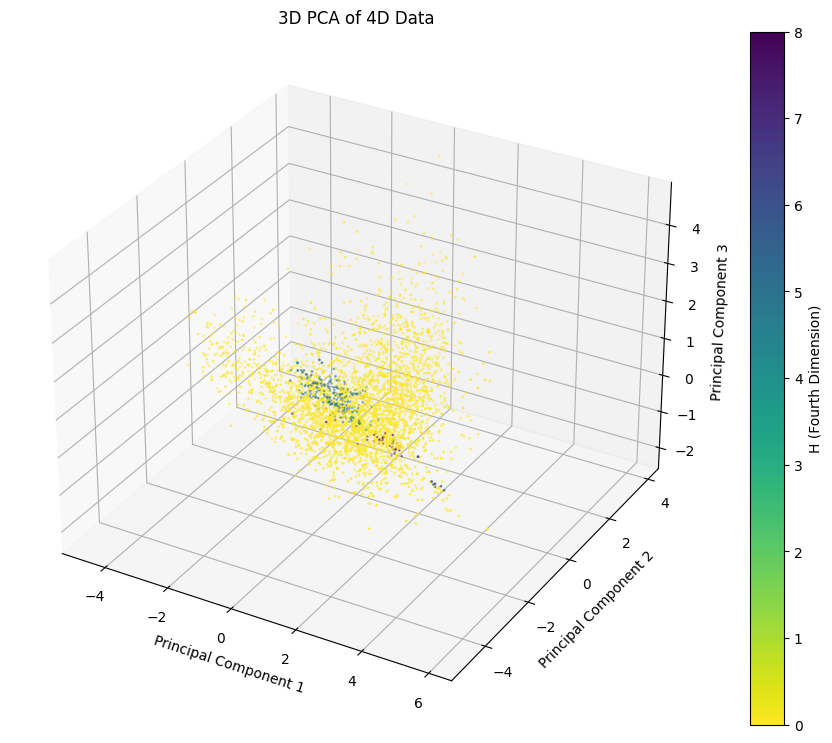

In [127]:
# Combine x, y, z into a single array for PCA
data = np.column_stack((x, y, z, color, s))  # Include color as part of the input data

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data)

# Create a figure for the 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
scatter = ax.scatter(
    data_3d[:, 0],
    data_3d[:, 1],
    data_3d[:, 2],
    c=scaled_tro_df['Family_ID'],  # Use the original color data for coloring the points
    s=1,
    marker='o',
    cmap='viridis_r'
)

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('H (Fourth Dimension)')

# Set the title
plt.title('3D PCA of 4D Data')

# Show the plot
plt.show()

# DBSCAN

Previous notebook,

In [128]:
from sklearn.cluster import DBSCAN

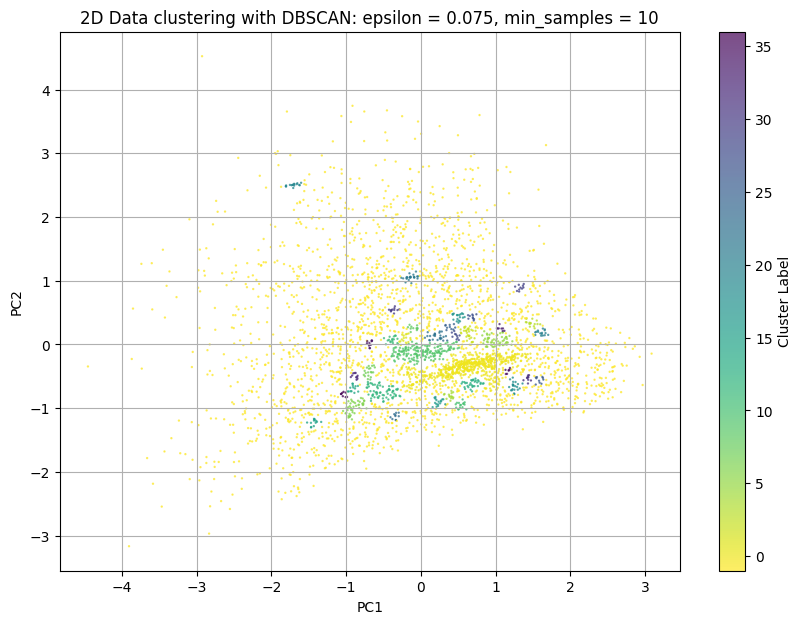

In [221]:
# Step 1: Define DBSCAN parameters
epsilon = 0.075  # boosting in section below
min_samples = 10

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_2d)

# Step 3: Create a scatter plot of the clustered data
plt.figure(figsize=(10, 7))
colors = np.where(clusters == -1, 'blue', 'red')
# Use a color map to represent different clusters
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, s=0.5, alpha=0.7, cmap='viridis_r')
plt.title(f'2D Data clustering with DBSCAN: epsilon = {epsilon}, min_samples = {min_samples}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid()
plt.show()

# "Elbow method" && "GridsearchCV"

GridsearchCV in traditional sense often refers to techniques used in supervised learning to find the optimal parameter combination. Here, since it is unsupervised and no traditional metrics like accuracy or precision are applicable, other evaluation may be used.

Some apparent options are Silhouette Score, Davies-Bouldin Index and Dunn Index. But consider the objective of our task is to detect compact region in contrary to the background noise. It would be sensible to measure the # of core points as  $\epsilon$ changes which can in some sense be viewed as Elbow Method applied to DBSCAN. In this context, the elbow point in this case will be identified by maximum changes or inflection point (where the convexity changes) that <mark>balances the detection of dense regions while avoiding excessive merging with background noise.</mark>

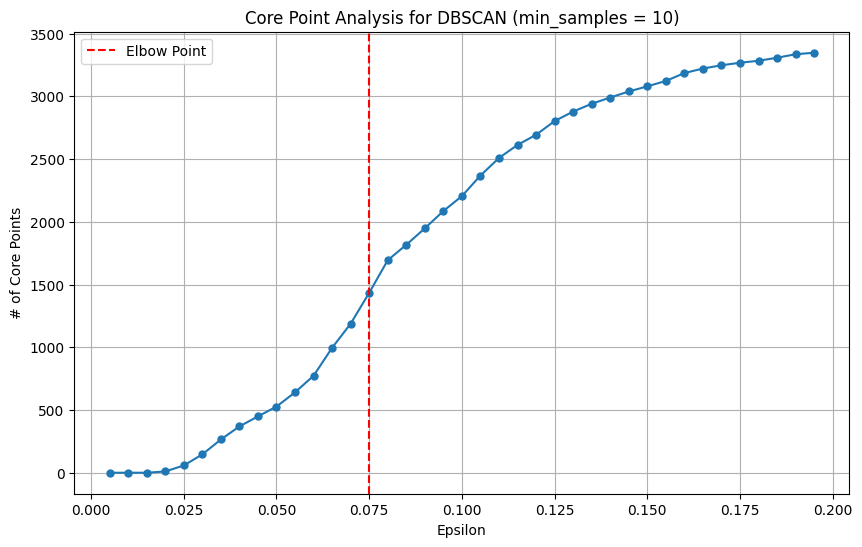

In [218]:
# Define epsilon values from 0.005 with a step = 0.01
epsilon_values = np.arange(0.005, 0.2, 0.005)  # Up to but not including 0.2
min_samples = 10  # Set a constant min_samples value

# Store the number of core points for each epsilon
core_points_count = []

# Loop through each epsilon value
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(data_2d)

    core_points = np.sum(labels != -1)  # Count the number of core points
    core_points_count.append(core_points)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, core_points_count, marker='o', markersize=5)
plt.title(f'Core Point Analysis for DBSCAN (min_samples = {min_samples})')
plt.xlabel('Epsilon')
plt.ylabel('# of Core Points')
plt.grid()
plt.axvline(x=epsilon_values[np.argmax(np.diff(core_points_count))], color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

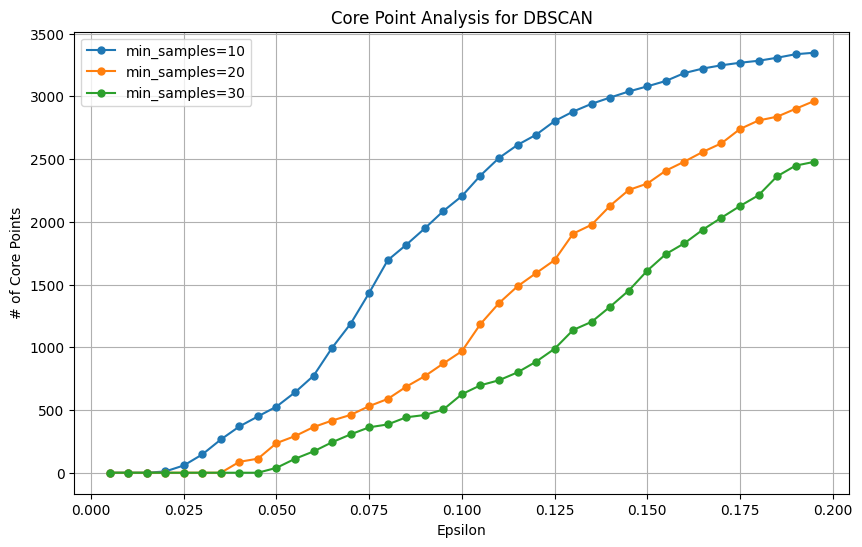

In [219]:
# Define epsilon values from 0.005 with a step = 0.005
epsilon_values = np.arange(0.005, 0.2, 0.005)  # Up to but not including 0.2
min_samples_values = [10, 20, 30]  # Different min_samples values

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each min_samples value
for min_samples in min_samples_values:
    core_points_count = []  # Reset the core points count for each min_samples

    # Loop through each epsilon value
    for epsilon in epsilon_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(data_2d)

        core_points = np.sum(labels != -1)  # Count the number of core points
        core_points_count.append(core_points)

    # Plot the results for the current min_samples
    plt.plot(epsilon_values, core_points_count, marker='o', markersize=5, label=f'min_samples={min_samples}')

# Title and labels
plt.title('Core Point Analysis for DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('# of Core Points')
plt.grid()
plt.legend()
plt.show()